<a href="https://colab.research.google.com/github/igarrido0/tree/blob/main/Clasificacion_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Machine Learning: Clasificación entre pacientes AD y no dementes.


Importación de datos

Los datos que hemos estudiado en R muestran como procesos como la autofágia, apoptosis y la respuesta a proteínas mal plegadas se alteran en pacientes que desarrollan AD.

Los datos que importaremos serán **normalized.Filtered.data.csv**, **info_Data.csv** y **normalized.Filtered.Annt.Data.csv** que guardamos durante el estudio de los datos en R.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

Primero importaremos los datos procedentes del archivo .csv como un pandas dataframe.


In [ ]:
# Read the CSV file
AD_data = pd.read_csv("normalized_Filtered_Data.csv") #Datos de expresión
AD_info = pd.read_csv("info_Data.csv")
AD_annt = pd.read_csv("normalized.Filtered.Annt.Data.csv")


# Shape
AD_data.shape



(9729, 196)

In [ ]:
AD_data.head()

,Unnamed: 0,GSM3895951,GSM3895952,GSM3895953,GSM3895954,GSM3895955,GSM3895956,GSM3895957,GSM3895958,GSM3895959,...,GSM3896136,GSM3896137,GSM3896138,GSM3896139,GSM3896140,GSM3896141,GSM3896142,GSM3896143,GSM3896144,GSM3896145
0,ILMN_1803686,6.779852,7.334403,7.383861,6.686028,6.612551,7.300873,6.723588,6.997760,6.632117,...,7.344313,7.087955,7.299929,7.579332,6.762379,6.797398,6.995620,6.754949,6.627431,7.182180
1,ILMN_1779228,11.448283,11.257059,11.350602,11.321413,11.091265,11.493620,11.481851,11.025361,11.135302,...,11.189525,11.022331,11.210365,11.236419,11.104603,11.315526,11.302379,11.051207,11.125790,11.425640
2,ILMN_2325610,8.085619,8.798399,7.911572,7.599272,7.560540,7.743388,7.674079,7.566850,7.758055,...,6.873030,6.829263,7.205170,7.091968,7.013473,6.834036,7.241916,6.690945,6.907570,6.695425
3,ILMN_3243593,9.371686,9.096767,8.451129,8.650487,8.520042,8.700932,8.367934,8.403874,8.394719,...,6.644262,7.049051,6.713763,7.915738,8.330537,6.400823,7.055127,6.841680,6.833493,6.465155
4,ILMN_3251587,10.176621,9.449903,9.854870,10.090573,10.264445,10.165807,9.771615,9.745449,9.129888,...,7.988134,9.448108,8.446439,10.233752,11.169024,7.265157,8.036492,9.090047,8.039581,7.500248


In [ ]:
AD_annt.head()

,Unnamed: 0,PROBEID,SYMBOL,ENTREZID,GENENAME,ID,Gene.title,Gene.symbol,Gene.ID,UniGene.title,...,GO.Function.ID,GO.Process.ID,GO.Component.ID,Platform_SEQUENCE,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,1,ILMN_1651228,RPS28,6234,ribosomal protein S28,ILMN_1651228,ribosomal protein S28,RPS28,6234.0,NaN,...,GO:0044822///GO:0005515///GO:0003735,GO:0006614///GO:0000184///GO:0006407///GO:0006...,GO:0005737///GO:0005829///GO:0022627///GO:0070...,CGCCACACGTAACTGAGATGCTCCTTTAAATAAAGCGTTTGTGTTT...,0.063892,11.625705,0.810008,4.189100e-01,4.661530e-01,-6.444874
1,2,ILMN_1651229,IPO13,9670,importin 13,ILMN_1651229,importin 13,IPO13,9670.0,NaN,...,GO:0008536///GO:0008139///GO:0005515///GO:0008565,GO:0006606,GO:0005737///GO:0031965,ACAAGAGGCGGGTGAAGGAGATGGTGAAGGAGTTCACACTGCTGTG...,0.085916,8.335174,1.057066,2.917725e-01,3.360149e-01,-6.217098
2,3,ILMN_1651254,LPP,4026,LIM domain containing preferred translocation ...,ILMN_1651254,LIM domain containing preferred translocation ...,LPP,4026.0,NaN,...,GO:0005515///GO:0008270,GO:0008150///GO:0007155,GO:0005737///GO:0005925///GO:0005634///GO:0005886,GTGCCTCAAGTCCATTTCTTGGGATCGCTCGTTTGGTGCACTCTCG...,0.434732,10.203683,6.257188,2.385118e-09,1.655122e-08,10.926587
3,4,ILMN_1651262,HNRNPAB,3182,heterogeneous nuclear ribonucleoprotein A/B,ILMN_1651262,heterogeneous nuclear ribonucleoprotein A/B,HNRNPAB,3182.0,NaN,...,GO:0003723///GO:0003729///GO:0000166///GO:0044...,GO:0001837///GO:0045893,GO:0090575///GO:0005737///GO:0030529///GO:0005...,CCAGAGCTCTAGGTGTTTAGGCAGCGTGTGGTGTCTGAGAGGCCAT...,0.078786,9.529137,1.968476,5.041197e-02,6.687457e-02,-4.866527
4,5,ILMN_1651278,SNIP1,79753,Smad nuclear interacting protein 1,ILMN_1651278,Smad nuclear interacting protein 1,SNIP1,79753.0,NaN,...,GO:0044822///GO:0005515,GO:0007249///GO:1903955///GO:0035196///GO:0006355,GO:0005737///GO:0005654,CCCAAGGTTGGAAAGCAGGGGAATTTCCCAGTGTCCTAGTTTTCCA...,0.069626,7.165656,2.362313,1.913343e-02,2.750431e-02,-4.040493


In [ ]:
AD_annt.info()
AD_annt = AD_annt[["PROBEID", "SYMBOL"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9729 entries, 0 to 9728
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9729 non-null   int64  
 1   PROBEID                9729 non-null   object 
 2   SYMBOL                 9729 non-null   object 
 3   ENTREZID               9729 non-null   int64  
 4   GENENAME               9729 non-null   object 
 5   ID                     9729 non-null   object 
 6   Gene.title             9084 non-null   object 
 7   Gene.symbol            9084 non-null   object 
 8   Gene.ID                9084 non-null   float64
 9   UniGene.title          28 non-null     object 
 10  UniGene.symbol         28 non-null     object 
 11  UniGene.ID             28 non-null     object 
 12  Nucleotide.Title       9085 non-null   object 
 13  GI                     9085 non-null   float64
 14  GenBank.Accession      9085 non-null   object 
 15  Plat

In [ ]:
df_merge = pd.merge(left=AD_data,right=AD_annt, left_on='Unnamed: 0', right_on='PROBEID')
df_merge.head()





,Unnamed: 0,GSM3895951,GSM3895952,GSM3895953,GSM3895954,GSM3895955,GSM3895956,GSM3895957,GSM3895958,GSM3895959,...,GSM3896138,GSM3896139,GSM3896140,GSM3896141,GSM3896142,GSM3896143,GSM3896144,GSM3896145,PROBEID,SYMBOL
0,ILMN_1803686,6.779852,7.334403,7.383861,6.686028,6.612551,7.300873,6.723588,6.997760,6.632117,...,7.299929,7.579332,6.762379,6.797398,6.995620,6.754949,6.627431,7.182180,ILMN_1803686,ADA
1,ILMN_1779228,11.448283,11.257059,11.350602,11.321413,11.091265,11.493620,11.481851,11.025361,11.135302,...,11.210365,11.236419,11.104603,11.315526,11.302379,11.051207,11.125790,11.425640,ILMN_1779228,CDH2
2,ILMN_2325610,8.085619,8.798399,7.911572,7.599272,7.560540,7.743388,7.674079,7.566850,7.758055,...,7.205170,7.091968,7.013473,6.834036,7.241916,6.690945,6.907570,6.695425,ILMN_2325610,AKT3
3,ILMN_3243593,9.371686,9.096767,8.451129,8.650487,8.520042,8.700932,8.367934,8.403874,8.394719,...,6.713763,7.915738,8.330537,6.400823,7.055127,6.841680,6.833493,6.465155,ILMN_3243593,RNA18SN5
4,ILMN_3251587,10.176621,9.449903,9.854870,10.090573,10.264445,10.165807,9.771615,9.745449,9.129888,...,8.446439,10.233752,11.169024,7.265157,8.036492,9.090047,8.039581,7.500248,ILMN_3251587,RNA28SN5


In [ ]:
#Modificamos ligeramente nuestro data frame para que aparezcan los simbolos en lugar de PROBEID
cols = df_merge.columns.tolist()
cols = cols[-1:] + cols[:-1] # moved the last element to the first position:

df_merge = df_merge[cols]

df_merge.head()

,SYMBOL,Unnamed: 0,GSM3895951,GSM3895952,GSM3895953,GSM3895954,GSM3895955,GSM3895956,GSM3895957,GSM3895958,...,GSM3896137,GSM3896138,GSM3896139,GSM3896140,GSM3896141,GSM3896142,GSM3896143,GSM3896144,GSM3896145,PROBEID
0,ADA,ILMN_1803686,6.779852,7.334403,7.383861,6.686028,6.612551,7.300873,6.723588,6.997760,...,7.087955,7.299929,7.579332,6.762379,6.797398,6.995620,6.754949,6.627431,7.182180,ILMN_1803686
1,CDH2,ILMN_1779228,11.448283,11.257059,11.350602,11.321413,11.091265,11.493620,11.481851,11.025361,...,11.022331,11.210365,11.236419,11.104603,11.315526,11.302379,11.051207,11.125790,11.425640,ILMN_1779228
2,AKT3,ILMN_2325610,8.085619,8.798399,7.911572,7.599272,7.560540,7.743388,7.674079,7.566850,...,6.829263,7.205170,7.091968,7.013473,6.834036,7.241916,6.690945,6.907570,6.695425,ILMN_2325610
3,RNA18SN5,ILMN_3243593,9.371686,9.096767,8.451129,8.650487,8.520042,8.700932,8.367934,8.403874,...,7.049051,6.713763,7.915738,8.330537,6.400823,7.055127,6.841680,6.833493,6.465155,ILMN_3243593
4,RNA28SN5,ILMN_3251587,10.176621,9.449903,9.854870,10.090573,10.264445,10.165807,9.771615,9.745449,...,9.448108,8.446439,10.233752,11.169024,7.265157,8.036492,9.090047,8.039581,7.500248,ILMN_3251587


Una vez tenemos el simbolo del gen asociado al nombre "ILMN_" correspondiente, eliminaremos estas columnas para poder visualizar los datos mejor y realizar nuestro modelo.


In [ ]:
#Eliminar columnas "Unnamed: 0" y "PROBEID"
df_merge.drop(columns=['Unnamed: 0', 'PROBEID'], inplace=True)


<ipython-input-365-248f6c584559>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop(columns=['Unnamed: 0', 'PROBEID'], inplace=True)


In [ ]:
# Transponemos el dataframe
AD_T = df_merge.set_index(df_merge.columns[0]).T

Las ultimas filas del archivo son:

In [ ]:
# View the first 5 rows
AD_T.tail()

SYMBOL,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,THOC1,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
GSM3896141,6.797398,11.315526,6.834036,6.400823,7.265157,7.409543,7.148354,7.832978,8.788176,9.223853,...,8.478175,7.647399,9.221769,8.736058,8.135499,6.558345,6.954772,9.096767,8.983684,7.099101
GSM3896142,6.995620,11.302379,7.241916,7.055127,8.036492,7.835232,7.054355,6.963970,8.535347,9.274832,...,8.672755,8.008738,8.466116,8.717726,8.605408,6.620266,6.892954,8.889230,9.203533,6.998196
GSM3896143,6.754949,11.051207,6.690945,6.841680,9.090047,7.850338,7.626666,7.783469,8.641979,9.754320,...,8.621967,8.639224,9.017049,8.707224,8.432687,6.542815,6.688691,8.898553,9.243110,7.112539
GSM3896144,6.627431,11.125790,6.907570,6.833493,8.039581,7.645956,7.236167,6.516364,8.593022,9.228509,...,8.246322,7.633286,9.099334,8.568192,8.309615,6.723324,6.902864,8.879447,9.020282,7.450656
GSM3896145,7.182180,11.425640,6.695425,6.465155,7.500248,7.245811,6.890047,7.204046,8.910798,9.436546,...,8.034079,7.626207,9.495015,8.627680,8.020309,6.436481,6.885801,9.149782,9.125976,7.354313


El archivo contiene la expresión genica de los 196 pacientes (valores numéricos). Para poder realizar nuestro algoritmo de machine learning debemos asociar nuestras muestras con una variable grupo (AD = pacientes con alzheimer, ND = pacientes no dementes). Este dato lo encontramos en la variable guardada como AD_info.


In [ ]:
AD_info.tail()

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,diagnosis:ch1,expired_age (years):ch1,Sex:ch1,tissue:ch1,group,sex
190,GSM3896141,middle_temporal_gyrus_ND_22_99-02,GSM3896141,Public on Jun 19 2019,Jun 18 2019,Jan 29 2024,RNA,1,middle_temporal_gyrus,Homo sapiens,...,85004,USA,NONE,42179,ND,70,female,middle temporal gyrus,ND,F
191,GSM3896142,middle_temporal_gyrus_ND_17_97-14,GSM3896142,Public on Jun 19 2019,Jun 18 2019,Jan 29 2024,RNA,1,middle_temporal_gyrus,Homo sapiens,...,85004,USA,NONE,42179,ND,76,male,middle temporal gyrus,ND,M
192,GSM3896143,middle_temporal_gyrus_ND_23_98-22,GSM3896143,Public on Jun 19 2019,Jun 18 2019,Jan 29 2024,RNA,1,middle_temporal_gyrus,Homo sapiens,...,85004,USA,NONE,42179,ND,90+,male,middle temporal gyrus,ND,M
193,GSM3896144,middle_temporal_gyrus_ND_18_97-37,GSM3896144,Public on Jun 19 2019,Jun 18 2019,Jan 29 2024,RNA,1,middle_temporal_gyrus,Homo sapiens,...,85004,USA,NONE,42179,ND,83,male,middle temporal gyrus,ND,M
194,GSM3896145,middle_temporal_gyrus_ND_24_98-32,GSM3896145,Public on Jun 19 2019,Jun 18 2019,Jan 29 2024,RNA,1,middle_temporal_gyrus,Homo sapiens,...,85004,USA,NONE,42179,ND,83,male,middle temporal gyrus,ND,M


Exploración de los datos:


In [ ]:
#Filas y columnas
AD_T.shape

#Tipo de dato por columna y NAs
AD_T.info()

#Estadísticos descriptivos
AD_T.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, GSM3895951 to GSM3896145
Columns: 9729 entries, ADA to SCO2
dtypes: float64(9729)
memory usage: 14.5+ MB


SYMBOL,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,THOC1,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,7.022746,11.263414,7.398031,8.371548,9.369757,8.304186,7.374805,7.075632,8.563798,9.398507,...,8.610188,7.867147,8.893158,8.897325,8.458775,6.592229,6.958309,8.943101,8.907077,7.270132
std,0.387891,0.275771,0.456418,1.471865,1.191397,0.573781,0.309696,0.438919,0.372023,0.286663,...,0.268959,0.323233,0.562578,0.355412,0.269077,0.283509,0.285320,0.297627,0.362323,0.247837
min,6.264233,10.305908,6.482621,6.348651,6.639325,7.086567,6.376968,6.163710,7.108501,8.674130,...,7.776980,7.199569,7.251218,7.477913,8.020309,6.117664,6.482843,7.794199,8.133415,6.495407
25%,6.741396,11.102925,7.092045,7.084738,8.364806,7.902589,7.191502,6.725825,8.443213,9.220075,...,8.438046,7.656157,8.617250,8.740611,8.257323,6.398936,6.784644,8.825868,8.630257,7.107095
50%,6.950173,11.270086,7.369917,8.074517,9.651376,8.191208,7.427294,7.028128,8.617836,9.362053,...,8.621221,7.807575,8.988413,8.985298,8.407972,6.528769,6.907865,8.996251,8.867632,7.279996
75%,7.218341,11.434025,7.656212,9.126962,10.277893,8.603506,7.568515,7.359235,8.829234,9.563171,...,8.785925,8.023212,9.302296,9.140358,8.638411,6.731654,7.046550,9.125307,9.138320,7.413068
max,8.354368,12.063314,8.798399,12.496183,11.754360,10.604875,8.116127,8.571476,9.349892,10.475506,...,9.245795,9.009709,9.932727,9.493803,9.450946,8.484867,8.278495,9.555576,10.296301,8.027779


In [ ]:
#Filas y columnas
AD_info.shape

#Tipo de dato por columna y NAs
AD_info.info()

#Estadísticos descriptivos
AD_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               195 non-null    object
 1   title                    195 non-null    object
 2   geo_accession            195 non-null    object
 3   status                   195 non-null    object
 4   submission_date          195 non-null    object
 5   last_update_date         195 non-null    object
 6   type                     195 non-null    object
 7   channel_count            195 non-null    int64 
 8   source_name_ch1          195 non-null    object
 9   organism_ch1             195 non-null    object
 10  characteristics_ch1      195 non-null    object
 11  characteristics_ch1.1    195 non-null    object
 12  characteristics_ch1.2    195 non-null    object
 13  characteristics_ch1.3    195 non-null    object
 14  molecule_ch1             195 non-null    o

,channel_count,taxid_ch1,contact_zip/postal_code,data_row_count
count,195.0,195.0,195.0,195.0
mean,1.0,9606.0,85004.0,42179.0
std,0.0,0.0,0.0,0.0
min,1.0,9606.0,85004.0,42179.0
25%,1.0,9606.0,85004.0,42179.0
50%,1.0,9606.0,85004.0,42179.0
75%,1.0,9606.0,85004.0,42179.0
max,1.0,9606.0,85004.0,42179.0


In [ ]:
#Nombre de columnas
AD_T.columns

Index(['ADA', 'CDH2', 'AKT3', 'RNA18SN5', 'RNA28SN5', 'MED6', 'NAALAD2',
       'SIGLEC14', 'ABI1', 'GNPDA1',
       ...
       'THOC1', 'REC8', 'HNRNPDL', 'DMTF1', 'PPP4R1', 'CDH1', 'SLC12A6',
       'PTBP3', 'DGCR2', 'SCO2'],
      dtype='object', name='SYMBOL', length=9729)

In [ ]:
#Unimos nuestra clase para clasificar (columna grupo) con datos de expresión genica
AD_T.reset_index(drop=True, inplace=True)
AD_info.reset_index(drop=True, inplace=True)

datos_estudio = pd.concat([AD_T, AD_info["group"]], axis=1)
datos_estudio.head()


,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2,group
0,6.779852,11.448283,8.085619,9.371686,10.176621,8.205006,7.596244,6.649971,8.210949,10.177516,...,8.308201,8.075809,8.536910,8.397273,6.435220,7.134304,8.888669,9.452589,7.474351,ND
1,7.334403,11.257059,8.798399,9.096767,9.449903,8.714837,6.523864,7.312414,8.082518,9.557994,...,8.013791,8.087637,7.722732,8.845770,6.117664,7.024774,8.326020,8.977818,7.724529,ND
2,7.383861,11.350602,7.911572,8.451129,9.854870,8.333377,7.310796,6.740825,8.236049,9.963751,...,7.898225,8.742089,8.773048,8.379499,6.551982,7.041400,8.647691,9.199473,7.485374,ND
3,6.686028,11.321413,7.599272,8.650487,10.090573,8.088288,7.431161,6.680426,8.533666,9.925876,...,8.058711,8.992054,8.818092,8.415293,6.507037,7.016982,9.369189,9.043095,7.607424,ND
4,6.612551,11.091265,7.560540,8.520042,10.264445,7.934242,7.521635,6.817889,8.846434,9.385874,...,7.802759,9.402223,9.054833,8.186730,6.515848,7.058426,9.094603,8.523283,7.470021,ND


In [ ]:
# Calculo de media y varianza de cada grupo.
agg = datos_estudio.groupby('group').agg([np.mean, np.var])
agg

ADA                 CDH2                AKT3            RNA18SN5  \
           mean       var       mean       var      mean       var      mean   
group                                                                          
AD     7.162528  0.144368  11.237242  0.088006  7.473808  0.231644  8.654628   
ND     6.884391  0.119161  11.289318  0.063638  7.323028  0.175954  8.091356   

                 RNA28SN5            ...      CDH1             SLC12A6  \
            var      mean       var  ...      mean       var      mean   
group                                ...                                 
AD     2.546072  9.252900  1.445571  ...  6.621988  0.112753  7.035178   
ND     1.653496  9.485423  1.381015  ...  6.562773  0.047401  6.882224   

                    PTBP3               DGCR2                SCO2            
            var      mean       var      mean       var      mean       var  
group                                                                        
AD     0.119324  8.867265  0.127558  8.867448  0.162234  7.277343  0.058249  
ND     0.032964  9.018164  0.039478  8.946300  0.098870  7.262994  0.065095  

[2 rows x 19458 columns]

Normalizaremos las expresion génica con la **transformación minmax**.

Realizaremos la normalización de todas las variables independientes. Estas se encuentran en nuestra variable AD_T.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Dataframe solo de columnas numericas (todas excepto MouseID)
datos_num = AD_T[[i for i in AD_T.columns if AD_T[i].dtypes != 'O']]

scaler = MinMaxScaler()
scaler = scaler.fit(datos_num)
datos_num_minmax = scaler.transform(datos_num)
datos_num_minmax

#Para volver a tener nuestro dataframe normalizado utilizamos los index del dataframe de nuestros datos que no contiene la columna MouseID
data_scaled = pd.DataFrame(datos_num_minmax, index=AD_T.index, columns=AD_T.columns)
data_scaled

SYMBOL,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,THOC1,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
0,0.246692,0.650035,0.692207,0.491748,0.691549,0.317891,0.701072,0.201955,0.491859,0.834576,...,0.850839,0.612457,0.307510,0.525325,0.263493,0.134148,0.362799,0.621372,0.609914,0.638842
1,0.512010,0.541224,1.000000,0.447027,0.549474,0.462799,0.084463,0.477083,0.434559,0.490660,...,0.174294,0.449812,0.311921,0.121444,0.576989,0.000000,0.301802,0.301935,0.390406,0.802104
2,0.535672,0.594452,0.617050,0.342004,0.628646,0.354378,0.536942,0.239689,0.503057,0.715909,...,0.842770,0.385968,0.555982,0.642463,0.251070,0.183473,0.311061,0.484560,0.492887,0.646035
3,0.201803,0.577843,0.482193,0.374432,0.674726,0.284717,0.606151,0.214604,0.635840,0.694883,...,0.619540,0.474628,0.649200,0.664807,0.276090,0.164486,0.297463,0.894181,0.420586,0.725684
4,0.166649,0.446884,0.465468,0.353213,0.708718,0.240932,0.658173,0.271696,0.775381,0.395111,...,0.371389,0.333229,0.802162,0.782245,0.116327,0.168209,0.320543,0.738288,0.180253,0.636016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.255086,0.574493,0.151748,0.008487,0.122351,0.091799,0.443540,0.693285,0.749390,0.305168,...,0.477388,0.247401,0.734867,0.624114,0.080517,0.186161,0.262818,0.739517,0.393118,0.393961
191,0.349923,0.567012,0.327879,0.114920,0.273149,0.212791,0.389491,0.332366,0.636590,0.333469,...,0.609862,0.447020,0.453065,0.615020,0.408978,0.212319,0.228391,0.621690,0.494764,0.328111
192,0.234777,0.424091,0.089959,0.080199,0.479121,0.217085,0.718565,0.672723,0.684164,0.599647,...,0.575285,0.795328,0.658521,0.609811,0.288248,0.179601,0.114637,0.626983,0.513062,0.402730
193,0.173768,0.466530,0.183502,0.078868,0.273753,0.158994,0.494032,0.146465,0.662321,0.307753,...,0.319538,0.239604,0.689207,0.540843,0.202222,0.255855,0.233910,0.616136,0.410039,0.623380


Una vez que ya hemos normalizado todas las variables uniremos nuestros datos en una misma tabla como hicimos anteriormente para explorar los datos.

In [ ]:
datos_estudio_scaled = pd.concat([data_scaled, AD_info["group"]], axis=1)
datos_estudio_scaled

,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2,group
0,0.246692,0.650035,0.692207,0.491748,0.691549,0.317891,0.701072,0.201955,0.491859,0.834576,...,0.612457,0.307510,0.525325,0.263493,0.134148,0.362799,0.621372,0.609914,0.638842,ND
1,0.512010,0.541224,1.000000,0.447027,0.549474,0.462799,0.084463,0.477083,0.434559,0.490660,...,0.449812,0.311921,0.121444,0.576989,0.000000,0.301802,0.301935,0.390406,0.802104,ND
2,0.535672,0.594452,0.617050,0.342004,0.628646,0.354378,0.536942,0.239689,0.503057,0.715909,...,0.385968,0.555982,0.642463,0.251070,0.183473,0.311061,0.484560,0.492887,0.646035,ND
3,0.201803,0.577843,0.482193,0.374432,0.674726,0.284717,0.606151,0.214604,0.635840,0.694883,...,0.474628,0.649200,0.664807,0.276090,0.164486,0.297463,0.894181,0.420586,0.725684,ND
4,0.166649,0.446884,0.465468,0.353213,0.708718,0.240932,0.658173,0.271696,0.775381,0.395111,...,0.333229,0.802162,0.782245,0.116327,0.168209,0.320543,0.738288,0.180253,0.636016,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.255086,0.574493,0.151748,0.008487,0.122351,0.091799,0.443540,0.693285,0.749390,0.305168,...,0.247401,0.734867,0.624114,0.080517,0.186161,0.262818,0.739517,0.393118,0.393961,ND
191,0.349923,0.567012,0.327879,0.114920,0.273149,0.212791,0.389491,0.332366,0.636590,0.333469,...,0.447020,0.453065,0.615020,0.408978,0.212319,0.228391,0.621690,0.494764,0.328111,ND
192,0.234777,0.424091,0.089959,0.080199,0.479121,0.217085,0.718565,0.672723,0.684164,0.599647,...,0.795328,0.658521,0.609811,0.288248,0.179601,0.114637,0.626983,0.513062,0.402730,ND
193,0.173768,0.466530,0.183502,0.078868,0.273753,0.158994,0.494032,0.146465,0.662321,0.307753,...,0.239604,0.689207,0.540843,0.202222,0.255855,0.233910,0.616136,0.410039,0.623380,ND


Separaremos nuestros datos en dos variables X e Y: X contendrá todos los valores numéricos e Y el valor de la clase. Después, separaremos nuestros datos en train y test.

In [ ]:
#codificación x e y
y = AD_info["group"]
x = datos_estudio_scaled.drop(datos_estudio_scaled.columns[-1], axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

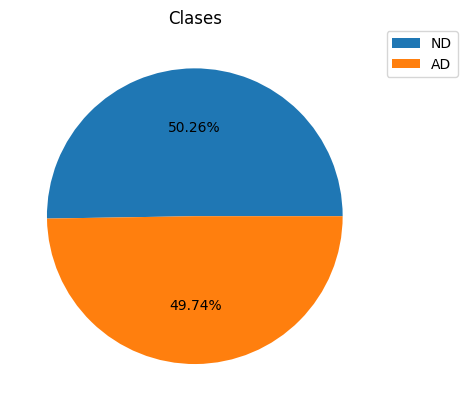

In [ ]:
#visualización
ax = y.value_counts().plot.pie(autopct= '%.2f%%', ylabel= "", title= "Clases",
                               legend=True, labeldistance=None)
ax.legend(bbox_to_anchor=(1,1.02), loc='upper left')
plt.show

In [ ]:
# Resumen de variables:
x.describe(percentiles=[0.1, 0.25, 0.75, 0.9])

,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,THOC1,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.362902,0.544840,0.395293,0.329058,0.533805,0.346081,0.573747,0.378742,0.649283,0.402124,...,0.567265,0.368799,0.612319,0.704112,0.306483,0.200475,0.264787,0.652275,0.357699,0.505572
std,0.185582,0.156920,0.197091,0.239424,0.232921,0.163084,0.178073,0.182293,0.165978,0.159136,...,0.183113,0.178568,0.209799,0.176305,0.188082,0.119765,0.158895,0.168974,0.167518,0.161735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.168334,0.362150,0.162089,0.061151,0.208951,0.160388,0.360182,0.169604,0.437608,0.220671,...,0.349938,0.182176,0.302678,0.462322,0.101505,0.086186,0.114822,0.426884,0.159377,0.295710
25%,0.228293,0.453519,0.263162,0.119737,0.337335,0.231936,0.468349,0.233459,0.595484,0.303071,...,0.450067,0.252239,0.509426,0.626372,0.165670,0.118820,0.168074,0.585717,0.229712,0.399177
50%,0.328180,0.548637,0.383152,0.280741,0.588862,0.313969,0.603928,0.359012,0.673392,0.381887,...,0.574777,0.335889,0.647842,0.747752,0.270973,0.173667,0.236695,0.682450,0.339462,0.512009
75%,0.456482,0.641922,0.506781,0.451939,0.711348,0.431156,0.685128,0.496529,0.767708,0.493534,...,0.686911,0.455016,0.764897,0.824670,0.432046,0.259374,0.313929,0.755720,0.464613,0.598850
90%,0.589349,0.743792,0.677089,0.697047,0.807123,0.604617,0.775047,0.632993,0.817126,0.601050,...,0.797919,0.613197,0.836033,0.871849,0.561500,0.350343,0.435961,0.819621,0.584238,0.677011
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pyplot

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [ ]:
x_train.head()

,ADA,CDH2,AKT3,RNA18SN5,RNA28SN5,MED6,NAALAD2,SIGLEC14,ABI1,GNPDA1,...,THOC1,REC8,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
31,0.222088,0.378895,0.273763,0.097693,0.436920,0.155014,0.419694,0.512261,0.770137,0.412326,...,0.162629,0.354103,0.571056,0.580563,0.137203,0.091349,0.260537,0.726606,0.421106,0.570938
154,0.415329,0.521122,0.548757,0.685572,0.657078,0.106899,0.735524,0.264219,0.667189,0.451530,...,0.639305,0.396877,0.778503,0.799825,0.269673,0.339853,0.246920,0.632923,0.416450,0.505180
35,0.501755,0.470226,0.239156,0.155707,0.348518,0.233061,0.523778,0.769709,0.649321,0.531072,...,0.598444,0.190389,0.510211,0.665908,0.363096,0.156203,0.099119,0.583380,0.445934,0.778410
44,0.390192,0.635947,0.681556,0.296444,0.499719,0.327937,0.362074,0.471127,0.720952,0.286087,...,0.419892,0.266920,0.438559,0.610305,0.464895,0.141253,0.238812,0.629557,0.260960,0.366854
147,0.545677,0.499884,0.862605,0.362739,0.627563,0.210280,0.389379,0.342052,0.817409,0.423598,...,0.773312,0.214846,0.628606,0.689053,0.408614,0.226134,0.194173,0.653289,0.135611,0.912635


Codificamos la variable respuesta

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = y_train.values.reshape(-1, 1)
y_train = ohe.fit_transform(y_train).toarray()
y_train.shape

(136, 2)

In [ ]:
y_test = y_test.values.reshape(-1, 1)
y_test=ohe.fit_transform(y_test).toarray()
y_test.shape

(59, 2)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
#cambiamos de pandas dataframe a numpy array
x_train = x_train.to_numpy()
type(x_train)

numpy.ndarray

In [ ]:
x_test = x_test.to_numpy()
type(x_test)

numpy.ndarray


Creamos y evaluamos el modelo de red neuronal:


In [ ]:
#Necesitamos:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
n_var = x.shape[1]

In [ ]:
n_classes = 2

Modelo 0:

Definiremos un modelo de red neuronal con 1 capa oculta densa de 35 nodos, activación relu y añadiremos un 20% de dropout.

In [ ]:
#Neuronal network
modelo0 = Sequential()
modelo0.add(Dense(35, input_dim=n_var, activation='relu'))
modelo0.add(Dropout(.2))
modelo0.add(Dense(n_classes, activation='softmax'))

In [ ]:
#summary
modelo0.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 35)                340550    
                                                                 
 dropout_11 (Dropout)        (None, 35)                0         
                                                                 
 dense_20 (Dense)            (None, 2)                 72        
                                                                 
Total params: 340622 (1.30 MB)
Trainable params: 340622 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Despues de compilar podemos entrenar a nuestro modelo:

In [ ]:
history0 = modelo0.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 65ms/step - loss: 1.4406 - accuracy: 0.5556 - val_loss: 0.7598 - val_accuracy: 0.4286
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6397 - accuracy: 0.6389 - val_loss: 0.5542 - val_accuracy: 0.7143
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.6100 - accuracy: 0.6667 - val_loss: 0.5075 - val_accuracy: 0.8214
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.5612 - accuracy: 0.7037 - val_loss: 0.4863 - val_accuracy: 0.8929
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5385 - accuracy: 0.7407 - val_loss: 0.4904 - val_accuracy: 0.8214
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5827 - accuracy: 0.6944 - val_loss: 0.4531 - val_accuracy: 0.9286
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 0.5471 - accuracy: 0.7222 - val_loss: 0.3624 - val_accuracy: 0.8929
Epoch 8/50
4/4 [===========

Representamos la curvade aprendizaje de train y validación.

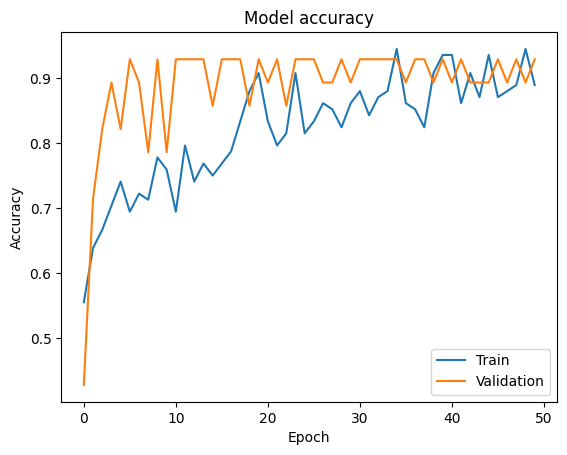

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Evaluamos el conjunto de datos con nuestro modelo0

In [ ]:
y_pred = modelo0.predict(x_test)
pred = list()
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

2/2 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, test)
print('Accurcy is: ', acc*100)

Accurcy is:  91.52542372881356


In [ ]:
test = np.array(test)

In [ ]:
pred = np.array(pred)

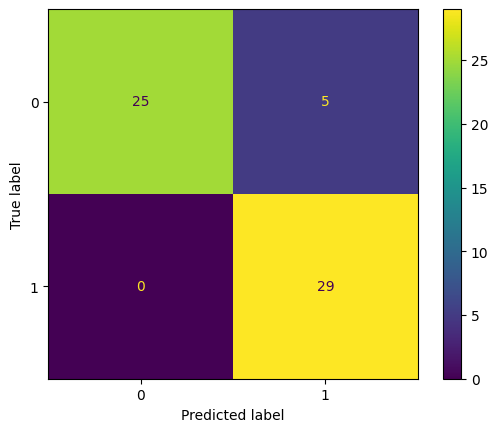

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = None)
disp.plot()
plt.show()

In [ ]:
print(classification_report(test,pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.85      1.00      0.92        29

    accuracy                           0.92        59
   macro avg       0.93      0.92      0.91        59
weighted avg       0.93      0.92      0.91        59



Probaremos a realizar un segundo modelo (Modelo 1):

Definiremos un modelo de red neuronal con 2 capas ocultas densas de 35 y 15 nodos respectivamente, activación relu y añadiremos un 20% de dropout. Compararemos qué modelo consigue clasificar mejor a los dos tipos de pacientes.

In [ ]:
modelo1 = Sequential()
modelo1.add(Dense(35, input_dim = n_var, activation = 'relu'))
modelo1.add(Dropout(.2))
modelo1.add(Dense(15, activation='relu'))
modelo1.add(Dropout(.2))
modelo1.add(Dense(n_classes, activation='softmax'))

In [ ]:
modelo1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 35)                340550    
                                                                 
 dropout_12 (Dropout)        (None, 35)                0         
                                                                 
 dense_22 (Dense)            (None, 15)                540       
                                                                 
 dropout_13 (Dropout)        (None, 15)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 32        
                                                                 
Total params: 341122 (1.30 MB)
Trainable params: 341122 (1.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Representación de la curva de aprendizaje train y validación
history1 = modelo1.fit(x_train, y_train, epochs = 50, batch_size=32, validation_split = 0.2)


Epoch 1/50
4/4 [==============================] - 1s 98ms/step - loss: 0.9062 - accuracy: 0.5463 - val_loss: 0.6706 - val_accuracy: 0.5714
Epoch 2/50
4/4 [==============================] - 0s 28ms/step - loss: 1.1452 - accuracy: 0.4074 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 0.7012 - accuracy: 0.6019 - val_loss: 0.7146 - val_accuracy: 0.4643
Epoch 4/50
4/4 [==============================] - 0s 23ms/step - loss: 0.6690 - accuracy: 0.6111 - val_loss: 0.6454 - val_accuracy: 0.5714
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.7953 - accuracy: 0.5648 - val_loss: 0.5196 - val_accuracy: 0.7857
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.6950 - accuracy: 0.5556 - val_loss: 0.5488 - val_accuracy: 0.8571
Epoch 7/50
4/4 [==============================] - 0s 24ms/step - loss: 0.6436 - accuracy: 0.6111 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 8/50
4/4 [===========

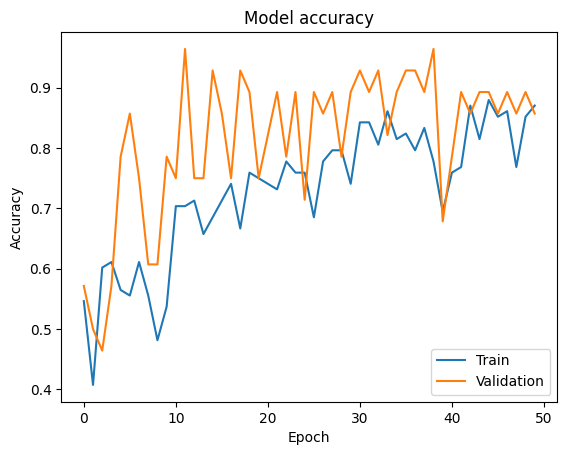

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc ='lower right')
plt.show()

In [ ]:
y_pred = modelo1.predict(x_test)
pred = list()
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))

2/2 [==============================] - 0s 5ms/step


In [ ]:
acc = accuracy_score(pred, test)
print('Accuracy is: ', acc*100)

Accuracy is:  86.4406779661017


In [ ]:
test = np.array(test)
pred = np.array(pred)

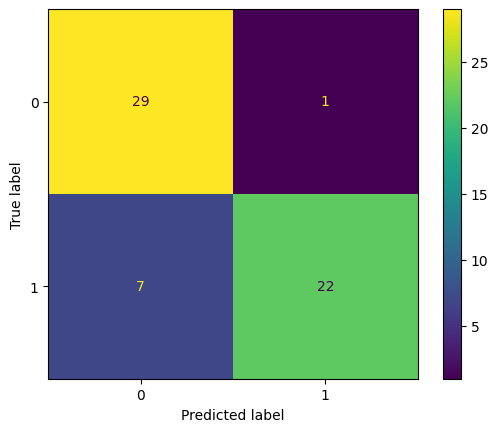

In [ ]:
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
disp.plot()
plt.show()

In [ ]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        30
           1       0.96      0.76      0.85        29

    accuracy                           0.86        59
   macro avg       0.88      0.86      0.86        59
weighted avg       0.88      0.86      0.86        59



In [ ]:
test_data = datos_estudio_scaled.sample(frac=0.33, random_state=2222)
train_data = datos_estudio_scaled.drop(test_data.index)

#Tomaremos el 20% de los datos de train para validation
train_data1 = train_data.sample(frac = 0.8, random_state = 2222)
val_data = train_data.drop(train_data1.index)

print(
    "Using %d samples for training, %d for validation and %d for testing"
    % (len(train_data1), len(val_data), len(test_data))
)

Using 105 samples for training, 26 for validation and 64 for testing


Bibliografía:
- Recursos procedentes de la asignatura "Machine Learning" de la UOC.
- Redes Neuronales Convolucionales (https://colab.research.google.com/github/juansensio/blog/blob/master/042_cnns/cnns.ipynb)
- Desarrolla una red neuronal convolucional en Keras con Python (http://blog.hadsonpar.com/2021/08/crear-una-red-neuronal-convolucional-en.html)